https://root.cern/doc/master/rf202__extendedmlfit_8C.html

In [1]:
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooChebychev.h"
#include "RooAddPdf.h"
#include "RooExtendPdf.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
using namespace RooFit;


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
TCanvas *c1 = new TCanvas("c1","c1",900, 600);

In [3]:
// S e t u p   c o m p o n e n t   p d f s
// ---------------------------------------
 
// Declare observable x
RooRealVar x("x", "x", 0, 10);
 
// Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and their parameters
RooRealVar mean("mean", "mean of gaussians", 5);
RooRealVar sigma1("sigma1", "width of gaussians", 0.5);
RooRealVar sigma2("sigma2", "width of gaussians", 1);
 
RooGaussian sig1("sig1", "Signal component 1", x, mean, sigma1);
RooGaussian sig2("sig2", "Signal component 2", x, mean, sigma2);
 
// Build Chebychev polynomial pdf
RooRealVar a0("a0", "a0", 0.5, 0., 1.);
RooRealVar a1("a1", "a1", 0.2, 0., 1.);
RooChebychev bkg("bkg", "Background", x, RooArgSet(a0, a1));
 
// Sum the signal components into a composite signal pdf
RooRealVar sig1frac("sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.);
RooAddPdf sig("sig", "Signal", RooArgList(sig1, sig2), sig1frac);

In [4]:
//----------------
// M E T H O D   1
//================
 
// C o n s t r u c t   e x t e n d e d   c o m p o s i t e   m o d e l
// -------------------------------------------------------------------
 
// Sum the composite signal and background into an extended pdf nsig*sig+nbkg*bkg
RooRealVar nsig("nsig", "number of signal events", 500, 0., 10000);
RooRealVar nbkg("nbkg", "number of background events", 500, 0, 10000);
RooAddPdf model("model", "(g1+g2)+a", RooArgList(bkg, sig), RooArgList(nbkg, nsig));

In [5]:
// S a m p l e ,   f i t   a n d   p l o t   e x t e n d e d   m o d e l
// ---------------------------------------------------------------------
 
// Generate a data sample of expected number events in x from model
// = model.expectedEvents() = nsig+nbkg
RooDataSet *data = model.generate(x);
 
// Fit model to data, extended ML term automatically included
model.fitTo(*data);
 
// Plot data and PDF overlaid, use expected number of events for pdf projection normalization
// rather than observed number of events (==data->numEntries())
RooPlot *xframe = x.frame(Title("extended ML fit example"));
data->plotOn(xframe);
model.plotOn(xframe, Normalization(1.0, RooAbsReal::RelativeExpected));
 
// Overlay the background component of model with a dashed line
model.plotOn(xframe, Components(bkg), LineStyle(kDashed), Normalization(1.0, RooAbsReal::RelativeExpected));
 
// Overlay the background+sig2 components of model with a dotted line
model.plotOn(xframe, Components(RooArgSet(bkg, sig2)), LineStyle(kDotted),Normalization(1.0, RooAbsReal::RelativeExpected));
 
// Print structure of composite pdf
model.Print("v");

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 nbkg         5.00000e+02  2.50000e+02    0.00000e+00  1.00000e+04
     4 nsig         5.00000e+02  2.50000e+02    0.00000e+00  1.00000e+04
     5 sig1frac     8.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
 **********
 **    3 **SET ER

In [6]:
//----------------
// M E T H O D   2
//================
 
// C o n s t r u c t   e x t e n d e d   c o m p o n e n t s   f i r s t
// ---------------------------------------------------------------------
 
// Associated nsig/nbkg as expected number of events with sig/bkg
RooExtendPdf esig("esig", "extended signal pdf", sig, nsig);
RooExtendPdf ebkg("ebkg", "extended background pdf", bkg, nbkg);

In [7]:
// S u m   e x t e n d e d   c o m p o n e n t s   w i t h o u t   c o e f s
// -------------------------------------------------------------------------
 
// Construct sum of two extended pdf (no coefficients required)
RooAddPdf model2("model2", "(g1+g2)+a", RooArgList(ebkg, esig));
 
// Draw the frame on the canvas
new TCanvas("rf202_composite", "rf202_composite", 600, 600);
//gPad->SetLeftMargin(0.15);
//xframe->GetYaxis()->SetTitleOffset(1.4);
xframe->Draw();

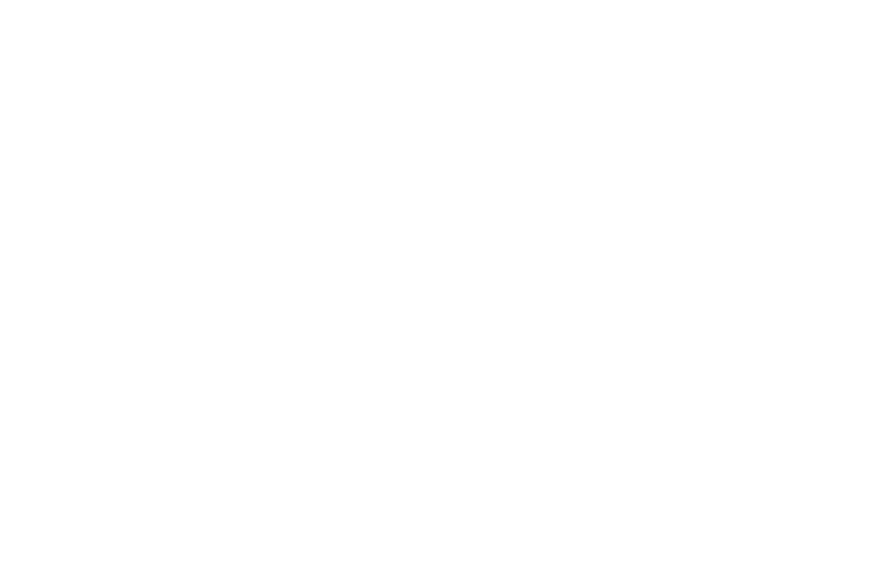

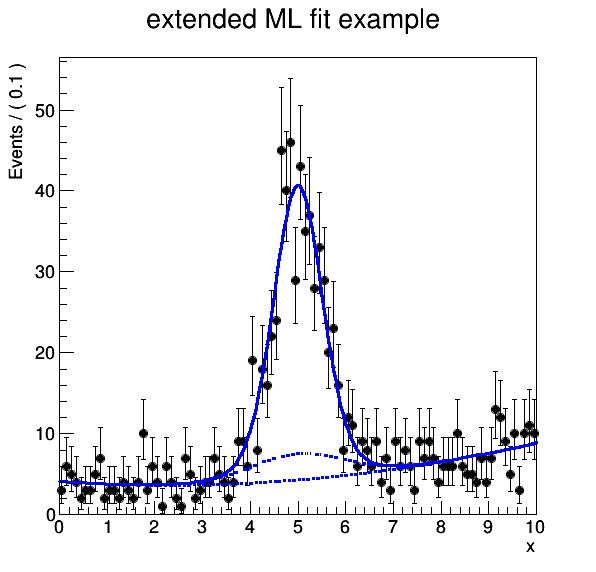

In [8]:
%jsroot off
gROOT->GetListOfCanvases()->Draw()